In [276]:
import pandas as pd


In [277]:
import numpy as np

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn 2.csv')

In [280]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [281]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [282]:
df.shape

(7043, 21)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [284]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [285]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [286]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [287]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

In [288]:
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup',
                                                                'DeviceProtection', 'TechSupport',
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [289]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [290]:
df=df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [291]:
churn_count=df['Churn'].value_counts()

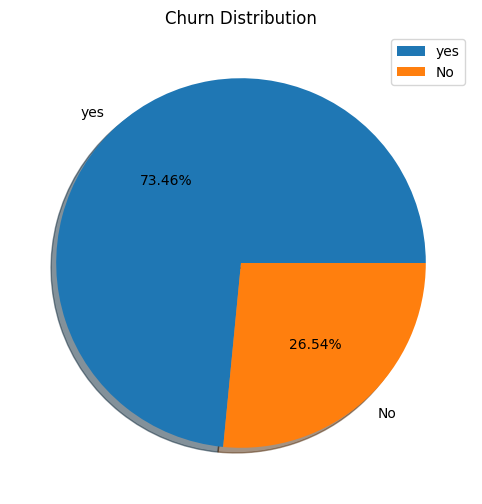

In [292]:
plt.figure(figsize=(8,6))
labels=['yes', 'No']
plt.pie(churn_count ,labels = labels,autopct='%0.2f%%', shadow=True)
plt.title('Churn Distribution')
plt.legend()
plt.show()

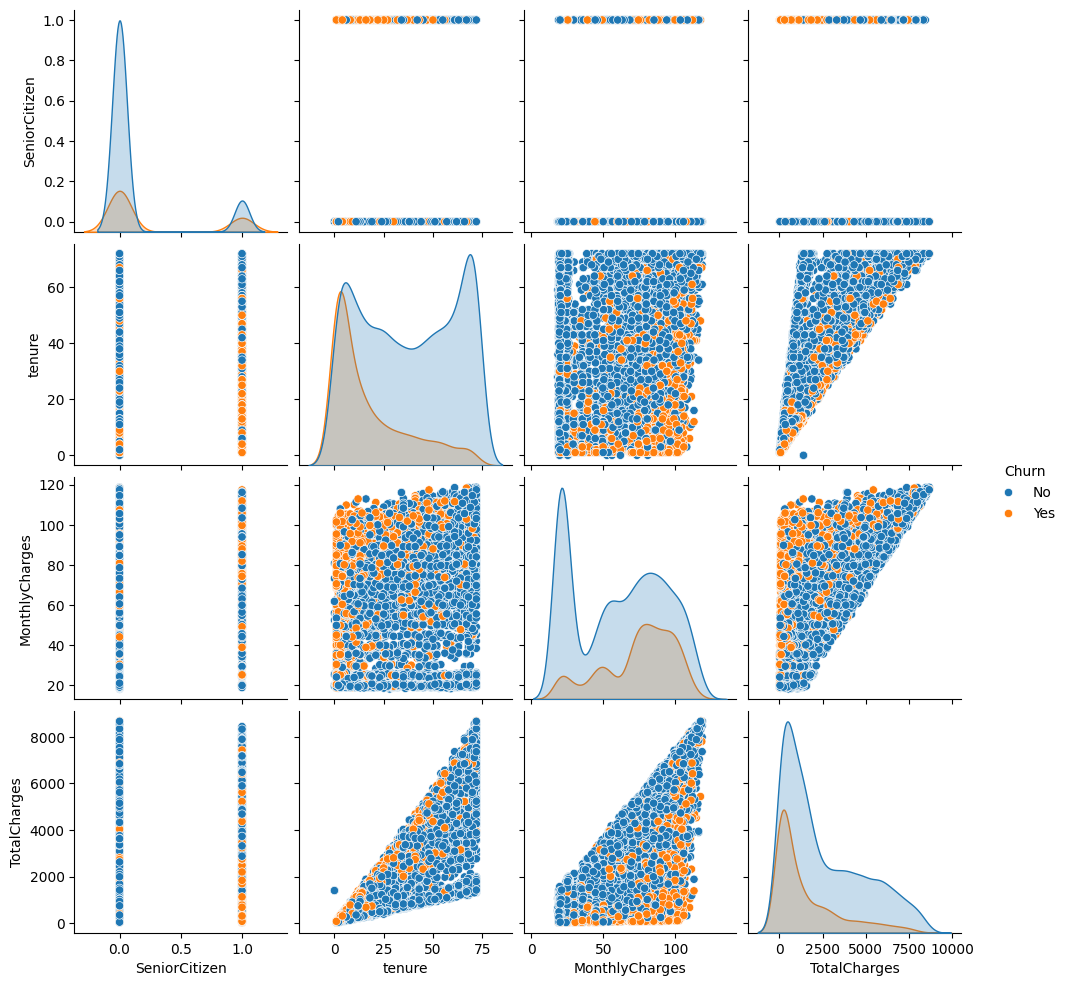

In [293]:
sns.pairplot(df, hue='Churn')
plt.show()

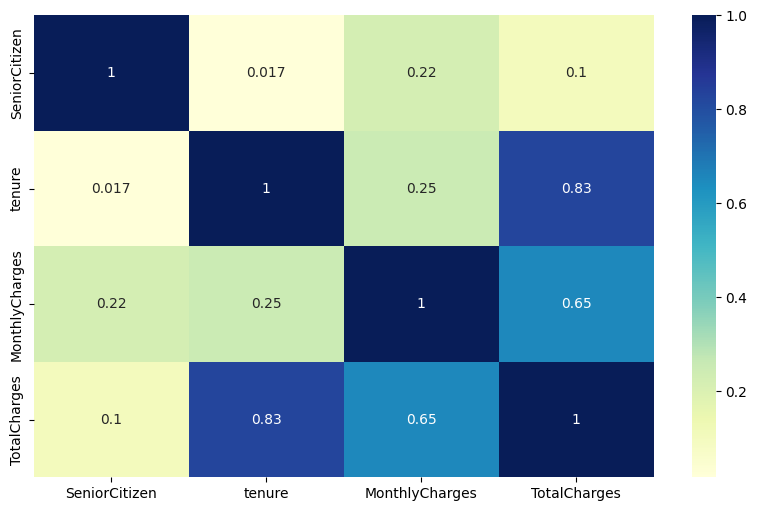

In [294]:
plt.figure(figsize=(10, 6))
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

### There is definitely some correlation between tenure and monthlycharges

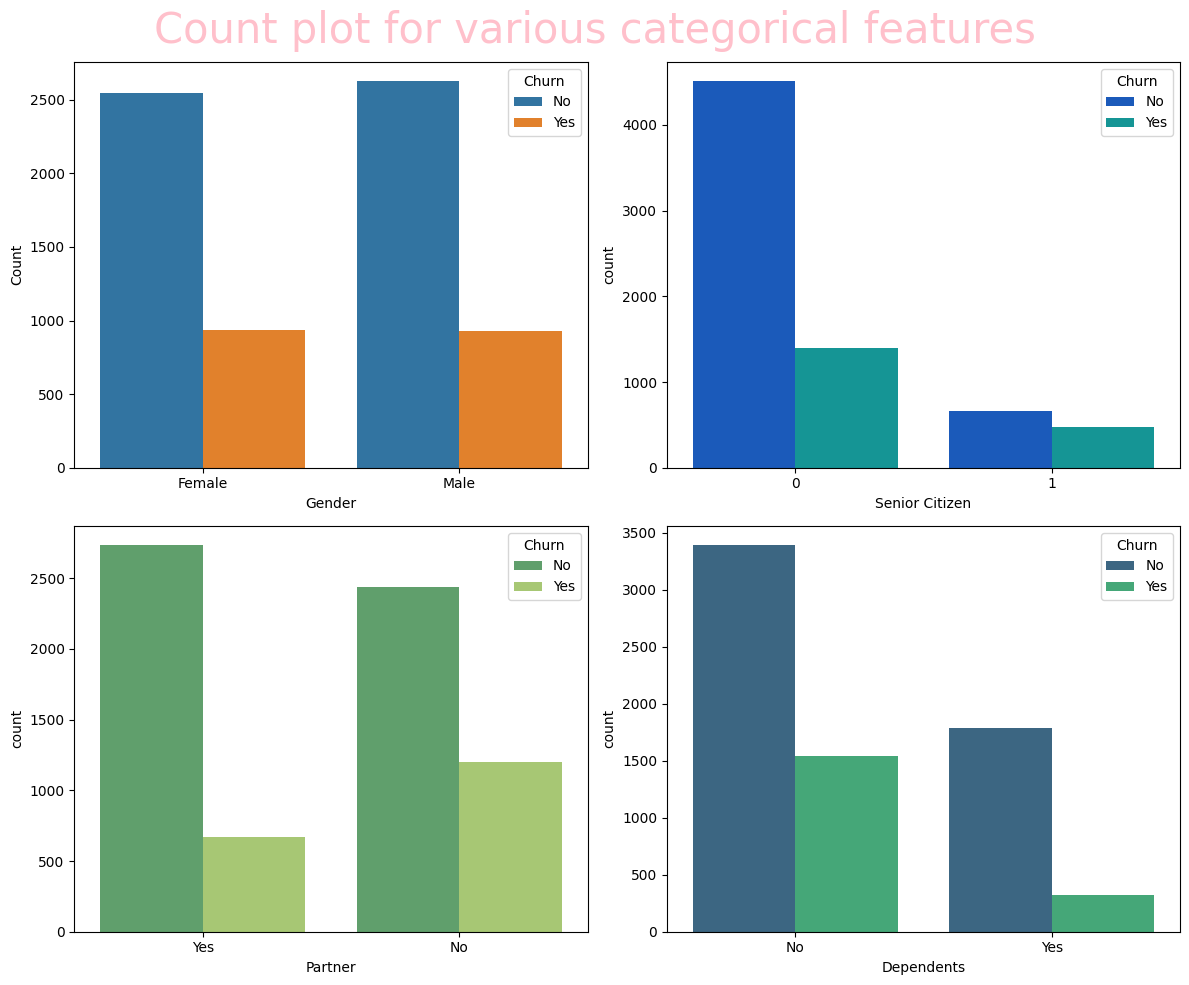

In [295]:
fig , ax = plt.subplots(2,2, figsize=(12,10))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'pink')

ax1=sns.countplot(x='gender', data=df, ax=ax[0,0],hue = 'Churn')
ax1.set(xlabel='Gender', ylabel='Count')

ax2 = sns.countplot(x ='SeniorCitizen', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

from above graphs ,it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning

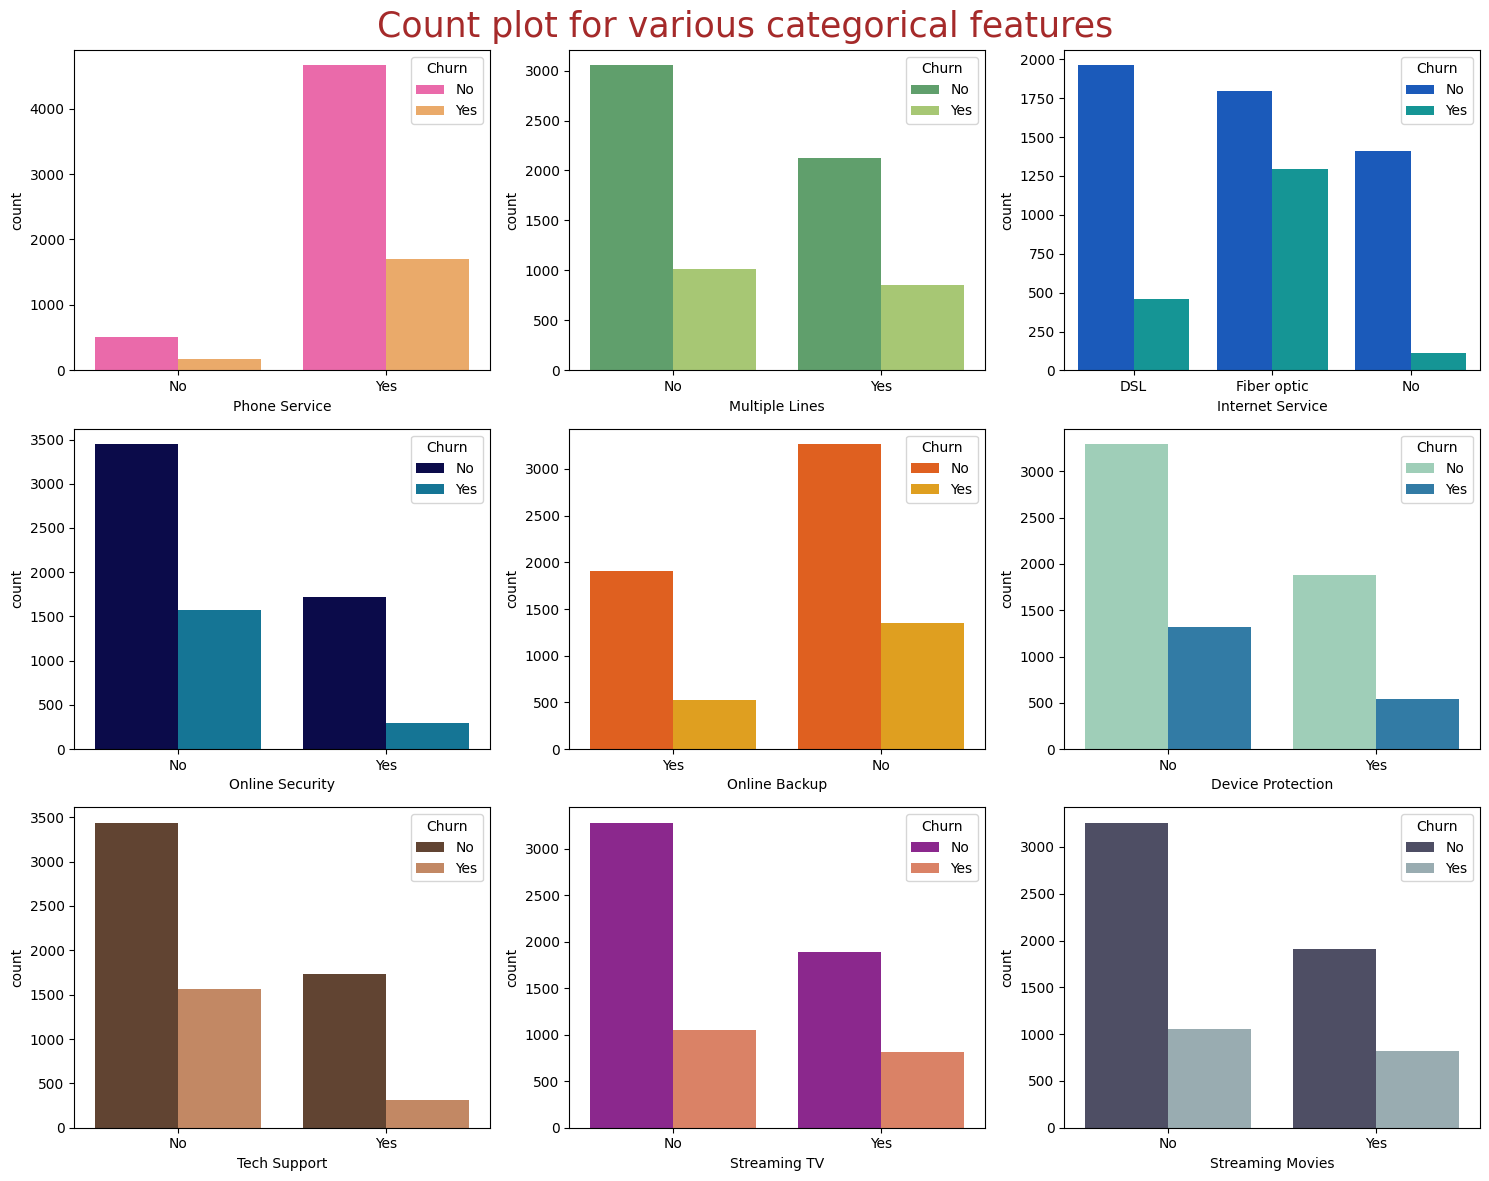

In [296]:
fig,ax = plt.subplots(3,3,figsize=(15,12))
plt.suptitle('Count plot for various categorical features', fontsize = 25, color= 'brown')

ax1= sns.countplot(x='PhoneService', data=df, hue='Churn', ax=ax[0,0], palette='spring')
ax1.set(xlabel='Phone Service')

ax2= sns.countplot(x='MultipleLines', data = df, hue = 'Churn',ax=ax[0,1], palette='summer')
ax2.set(xlabel="Multiple Lines")

ax3= sns.countplot(x='InternetService', data=df, hue='Churn', ax=ax[0,2], palette='winter')
ax3.set(xlabel='Internet Service')
ax4 = sns.countplot(x ='OnlineSecurity', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'ocean')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'autumn')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= df, hue= 'Churn', ax= ax[1, 2], palette= 'YlGnBu')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= df, hue= 'Churn', ax= ax[2, 0], palette= 'copper')
ax7.set(xlabel = 'Tech Support')

ax8 = sns.countplot(x ='StreamingTV', data= df, hue= 'Churn', ax= ax[2, 1], palette= 'plasma')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= df, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()


Customers having Fiber optic internet service are much more likely to churn than others.

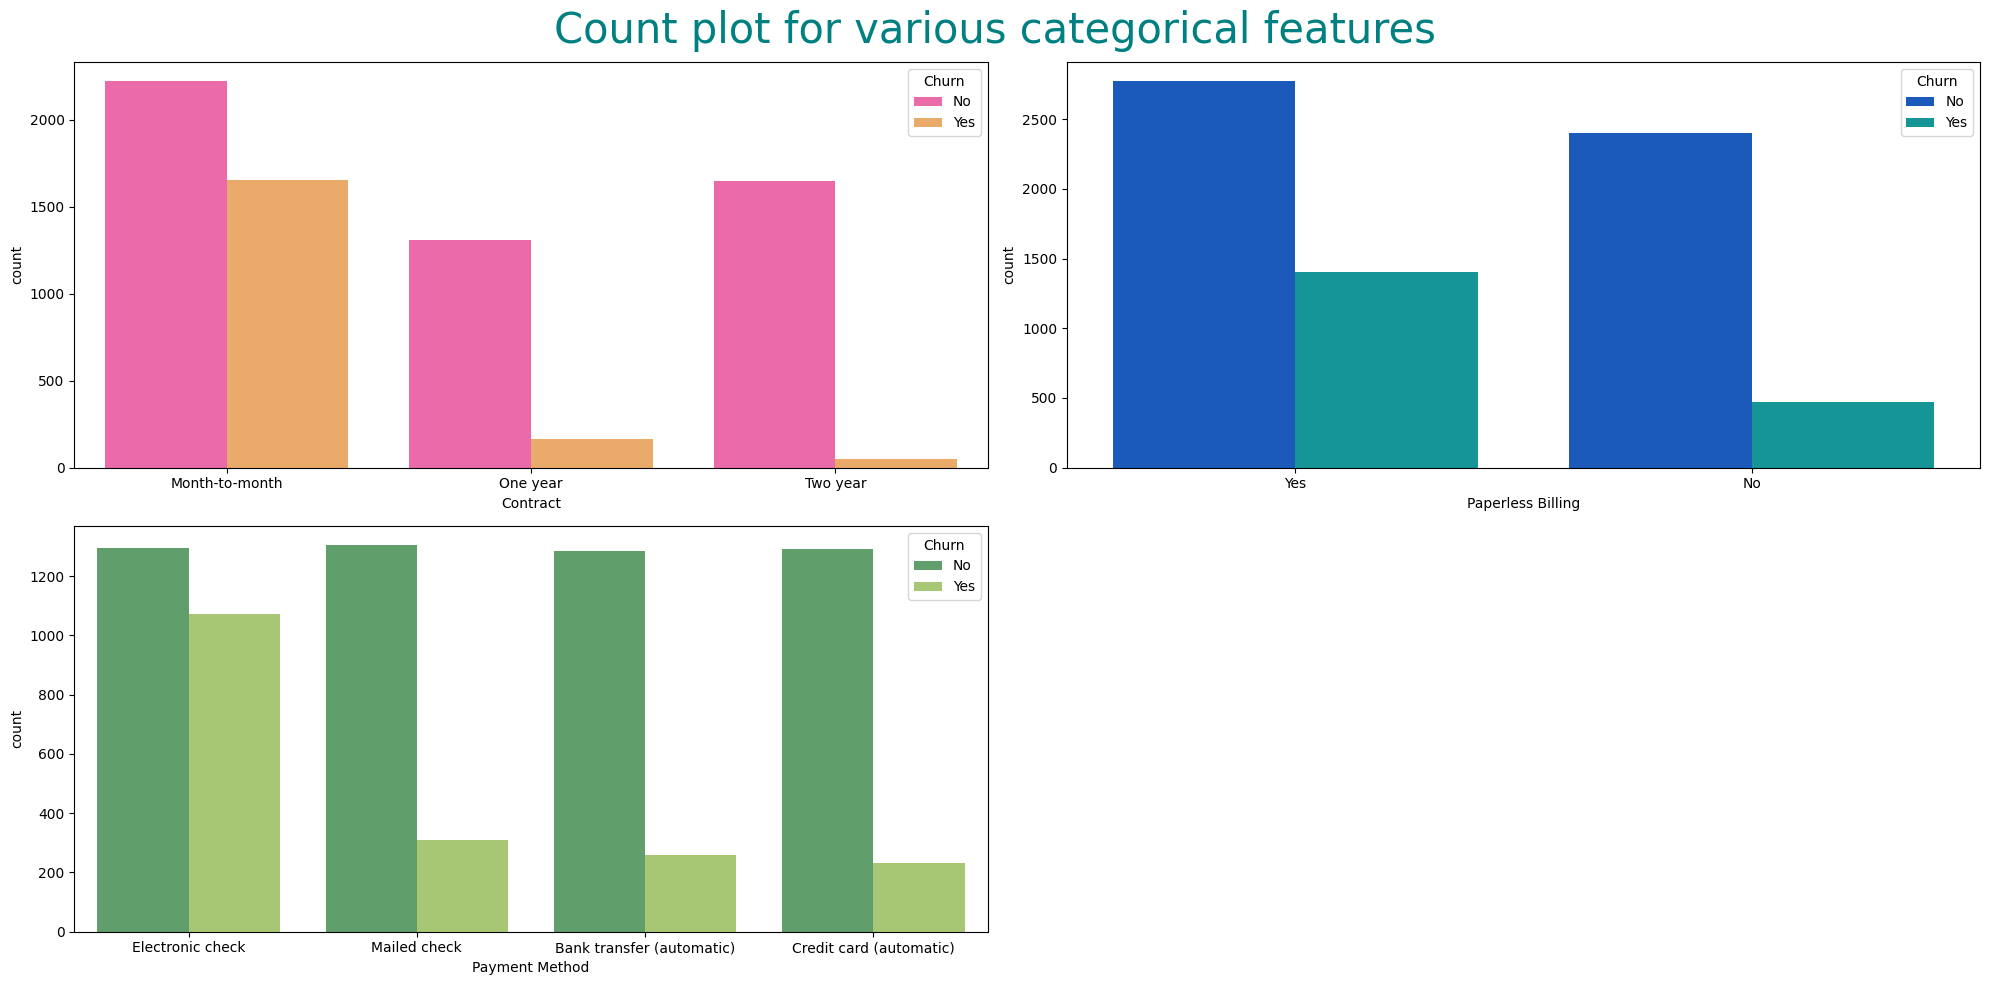

In [297]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='Contract', data=df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

Based on the Account information, customers having longer contracts are much more less likely to churn. Also, customers who use Electronic Check as a payment method have higher chances of churning then customers who use other methods.

In [298]:
#skewness
df['TotalCharges'] = np.log(df['TotalCharges'])

In [299]:
#Encoding
from sklearn.preprocessing import LabelEncoder , StandardScaler

Binary Encoding

In [300]:
binary_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for column in binary_col:
  df[column] = le.fit_transform(df[column])

One Hot Encoding

In [301]:
new_pay = pd.get_dummies(df['PaymentMethod'], drop_first=True , dtype = int)
df = pd.concat([df, new_pay], axis=1)
df.drop('PaymentMethod', axis=1, inplace=True)

Ordinal Encoding

In [302]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

df['InternetService'] = df['InternetService'].apply(lambda x: internet_ordering.index(x))
df['Contract'] = df['Contract'].apply(lambda x: contract_ordering.index(x))

In [303]:
X = df.drop('Churn', axis= 1)
X.shape


(7043, 21)

In [304]:
y = df['Churn']
y.shape

(7043,)

In [305]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [306]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)

In [307]:
X_train.shape

(5634, 21)

In [308]:
X_test.shape

(1409, 21)

In [309]:
y_train.shape

(5634,)

In [310]:
y_test.shape

(1409,)

In [311]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train



array([[ 0.99398331, -0.43659715,  1.037995  , ..., -0.52242958,
        -0.7116299 , -0.54850187],
       [ 0.99398331, -0.43659715,  1.037995  , ...,  1.91413356,
        -0.7116299 , -0.54850187],
       [ 0.99398331, -0.43659715,  1.037995  , ..., -0.52242958,
         1.40522483, -0.54850187],
       ...,
       [ 0.99398331, -0.43659715,  1.037995  , ..., -0.52242958,
         1.40522483, -0.54850187],
       [-1.00605311, -0.43659715, -0.96339577, ..., -0.52242958,
        -0.7116299 ,  1.82314783],
       [-1.00605311,  2.29044095, -0.96339577, ..., -0.52242958,
        -0.7116299 , -0.54850187]])

In [312]:
X_test = scaler.transform(X_test)

Churn Modelling: Random Forest Classifier


In [313]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [314]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [315]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [316]:
y_test

,Churn
6077,0
1503,0
173,1
1431,0
5114,0
...,...
288,1
5254,0
1895,0
1236,1


In [317]:
y_pred = model.predict(X_test)
y_pred.shape
print(y_pred)
y_prob = model.predict_proba(X_test)[:, 1]

[0 0 0 ... 0 1 0]


In [318]:
from sklearn.metrics import accuracy_score

In [319]:
y_pred = model.predict(X_test)
accuracy_score (y_test , y_pred)

0.7955997161107168

In [320]:
def print_results(name, y_true, y_pred, y_prob):
    print(f"=== {name} Performance ===")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_true, y_prob):.4f}\n")
    plt.show()

In [321]:
print_results("Random Forest", y_test, y_pred, y_prob)

=== Random Forest Performance ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1042
           1       0.63      0.53      0.58       367

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC: 0.8136



plotting graph

In [322]:
from sklearn.tree import plot_tree

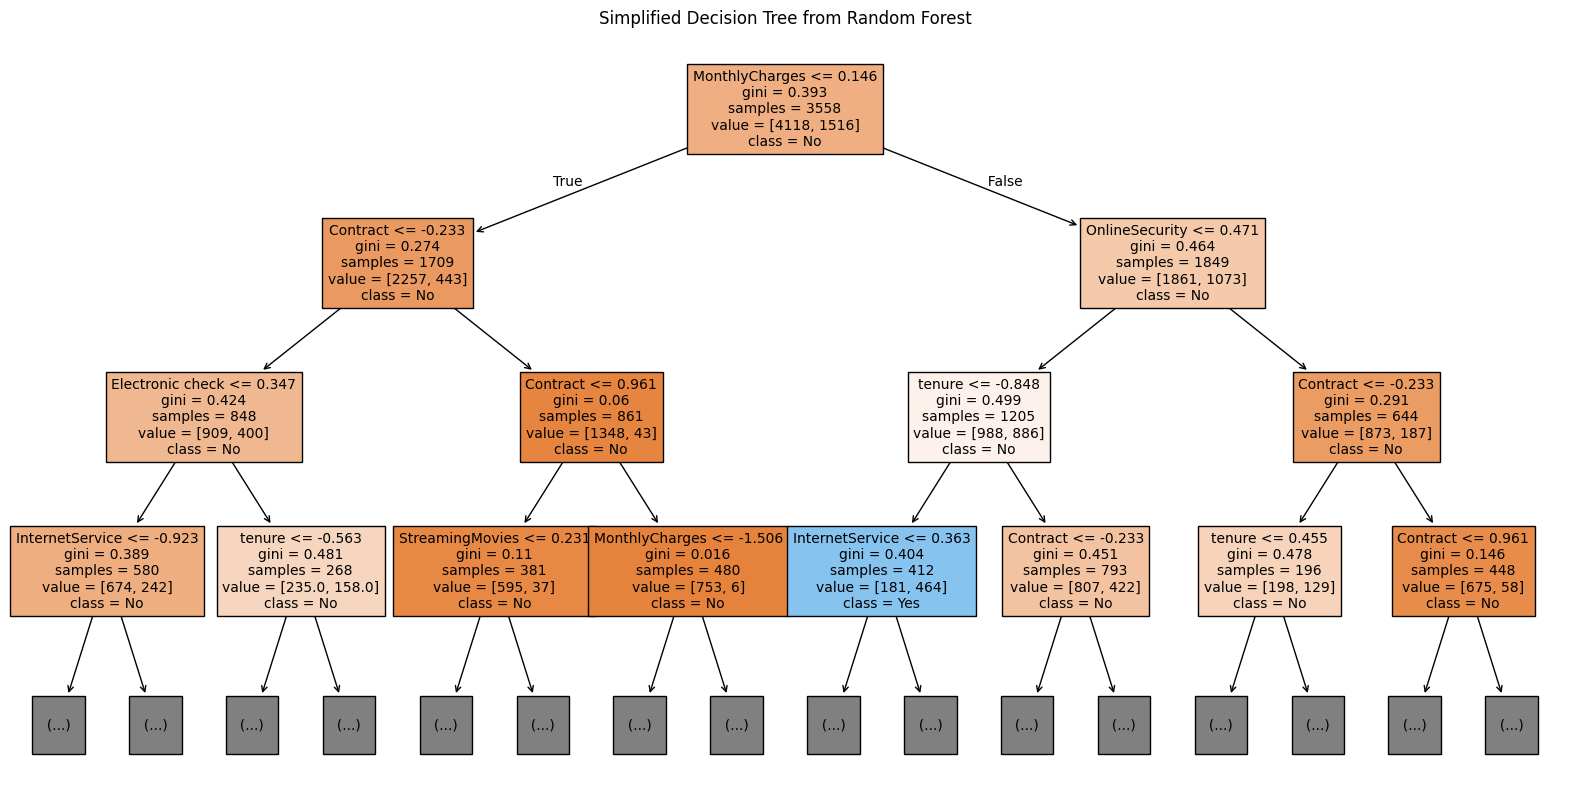

In [323]:
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=['No', 'Yes'],
          filled=True, max_depth=3, fontsize=10)
plt.title("Simplified Decision Tree from Random Forest")
plt.show()

/tmp/ipython-input-1853381248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


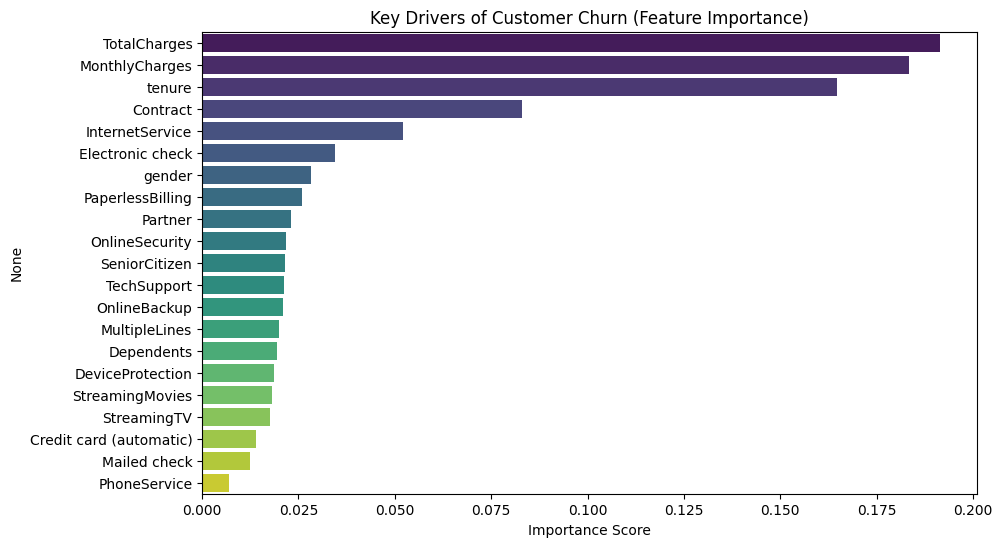

In [324]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title("Key Drivers of Customer Churn (Feature Importance)")
plt.xlabel("Importance Score")
plt.show()